In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./datos/cortos_estand.csv', index_col=0)

In [3]:
df.head()

,satisfaction,Customer Type,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding,Age_est,Flight Distance_est,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,0,0,4,3,3,5,3,2,1.676424,-1.758838,1,0,0,1,0,1,0
1,1,1,0,0,2,3,4,2,3,2,0.486731,0.583063,0,1,0,1,1,0,0
2,1,1,0,0,0,2,3,4,4,2,-1.628279,0.235878,1,0,0,1,0,1,0
3,1,1,0,0,4,1,1,4,1,3,1.345954,-1.377574,1,0,0,1,0,1,0
4,1,1,0,0,3,2,2,4,2,5,2.006895,-1.664055,1,0,0,1,0,1,0


## Separamos los datos

In [4]:
# separamos los datos en X e y

X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [5]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X1.head()

,Customer Type,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding,Age_est,Flight Distance_est,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,0,4,3,3,5,3,2,1.676424,-1.758838,1,0,0,1,0,1,0
1,1,0,0,2,3,4,2,3,2,0.486731,0.583063,0,1,0,1,1,0,0
2,1,0,0,0,2,3,4,4,2,-1.628279,0.235878,1,0,0,1,0,1,0
3,1,0,0,4,1,1,4,1,3,1.345954,-1.377574,1,0,0,1,0,1,0
4,1,0,0,3,2,2,4,2,5,2.006895,-1.664055,1,0,0,1,0,1,0


In [6]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y1.head()

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

## Train-Test split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

## Ajuste y predicción del modelo

In [8]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg .fit(x_train,y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test)

In [9]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
21941,0,0,Train
107401,1,1,Train
87803,1,0,Train
11078,1,0,Train
92586,1,1,Train


# Matriz de confusión

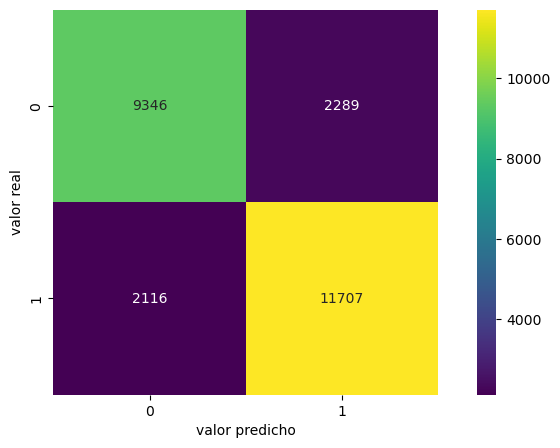

In [10]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (10, 5))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [11]:
# vamos a hacernos una función para sacar las métricas igual que hicimos con al regresión lineal.


def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [12]:
results_logistic = metricas(y_test, y_pred_test, y_train, y_pred_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.826970,0.836453,0.846922,0.841655,0.650954,test,Regresión logistica
1,0.831502,0.843147,0.849157,0.846141,0.659930,train,Regresión logistica


In [13]:
results_logistic.to_csv("./datos/resultados_regresion.csv")

**Interpretemos ahora los resultados** 


Si miramos los datos del test: 

- *Accuracy*: nuestro modelo acierta el 82.6% de la veces. 

- *Precision*:  tenemos un valor de 0.83, ¿esto que significa? que nuestro modelo se equivocará un 17% de las veces que prediga que un pasajero está satisfecho.

- *Recall*: tenemos un valor de 0.84. Es decir, nuestro modelo es capaz de identificar un 84% de los pasajeros que están satisfechos.

- *kappa* tenemos un valor de 0.65. Esto en realidad nos esta diciendo que la concordancia de nuestros datos es buena, es decir, que nuestro modelo esta acertando en sus predicciones. 


Con esto podemos ver que aunque en realidad nuestras métricas no parecen malas, con una Kappa de 0.65, nuestro modelo es bueno, aunque podría ser mejor.